In [1]:
from IPython.core.display import HTML, display
display(HTML("<style>.container { width: 98% !important }</style>"))

In [2]:
from utilities import *

In [3]:
import joblib
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ble = read_ble("../Data/ble.csv")

In [5]:
pin_file = "../Data/pin.csv"

pin = read_pin(pin_file)

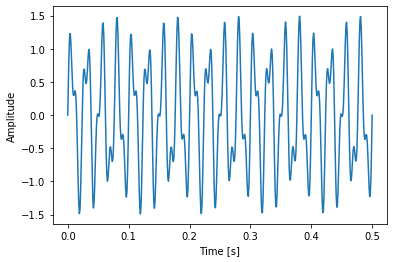

In [6]:
t = np.linspace(0, 0.5, 500)
s = np.sin(40 * 2 * np.pi * t) + 0.5 * np.sin(90 * 2 * np.pi * t)

plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, s)
plt.show()

In [7]:
fft = np.fft.fft(s)

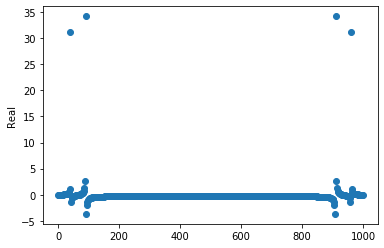

In [8]:
N = s.size
T = t[1] - t[0]

f = np.linspace(0, 1 / T, N)

plt.ylabel("Real")
plt.scatter(f, fft.real)
plt.show()

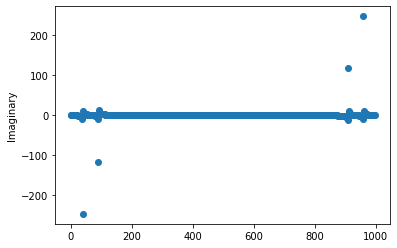

In [9]:
plt.ylabel("Imaginary")
plt.scatter(f, fft.imag)
plt.show()

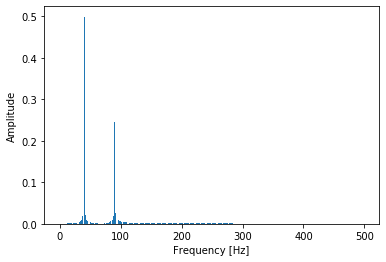

In [10]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(f[:N // 2], np.abs(fft)[:N // 2] * 1 / N, width=1.5)  # 1 / N is a normalization factor
plt.show()

In [11]:
data = read_data("../Data/rssi5.csv")
data[scanners] = min_max_scaling(data[scanners])

All beacons: ['0117C55D14E4']
Selecting all


In [12]:
data["X"] = data["location"].apply(lambda x: pin[x]["X"])
data["Y"] = data["location"].apply(lambda x: pin[x]["Y"])

In [13]:
data = data.groupby("location").rolling(30, min_periods=1).mean().reset_index()

In [14]:
def reg_impute(data):
    for s in scanners:
        dx = data['X'] - ble[s]['X']
        dy = data['Y'] - ble[s]['Y']
        d = np.sqrt(np.square(dy) + np.square(dx))
        reg = joblib.load('../Models/linear_distance_models/{}.joblib'.format(s))
        ss = pd.Series(reg.predict(d.values.reshape((-1, 1))))
        data[s].fillna(ss, inplace=True)
        
reg_impute(data)

In [15]:
V1_23 = data[data["location"] == "V1_23"]

In [16]:
V1_23.describe()

,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C,X,Y
count,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2.475000e+03,2.475000e+03
mean,15149.996364,0.242982,0.432617,0.289184,0.273019,0.339677,0.560424,0.435556,0.213383,0.502759,0.099258,0.557198,0.372341,0.419084,0.075787,0.435266,0.338565,0.246740,2.715160e+01,8.159480e+00
std,4290.016820,0.087823,0.038983,0.042208,0.077075,0.062966,0.036393,0.047327,0.058085,0.020109,0.050893,0.027357,0.047933,0.055627,0.010455,0.085406,0.056699,0.076616,3.643460e-15,1.776716e-15
min,10685.000000,0.133333,0.333333,0.133333,0.050000,0.066667,0.383333,0.225000,0.100000,0.433333,0.033333,0.466667,0.100000,0.300000,0.033333,0.150000,0.166667,0.066667,2.715160e+01,8.159480e+00
25%,11303.500000,0.176881,0.400000,0.266667,0.239871,0.299331,0.537500,0.408333,0.160440,0.488889,0.065011,0.544444,0.377778,0.356222,0.073707,0.391667,0.316667,0.202072,2.715160e+01,8.159480e+00
50%,11922.000000,0.176881,0.433333,0.281883,0.239871,0.299331,0.575000,0.444270,0.216667,0.505556,0.065011,0.556667,0.379957,0.416667,0.073707,0.466667,0.344444,0.202072,2.715160e+01,8.159480e+00
75%,19917.500000,0.330556,0.466667,0.300000,0.333333,0.391667,0.586667,0.466667,0.266667,0.518750,0.141667,0.575000,0.400000,0.458333,0.073707,0.500000,0.366667,0.333333,2.715160e+01,8.159480e+00
max,20536.000000,0.400000,0.508333,0.400000,0.416667,0.466667,0.616667,0.533333,0.316667,0.544444,0.250000,0.625000,0.433333,0.533333,0.116667,0.541667,0.450000,0.383333,2.715160e+01,8.159480e+00


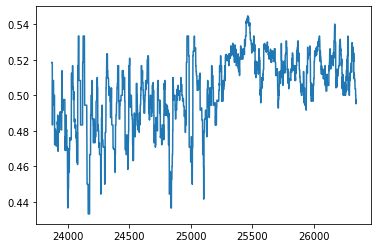

In [17]:
plt.plot(V1_23['E6D9D20DD197'])

In [18]:
fft = np.fft.fft(V1_23['E6D9D20DD197'])

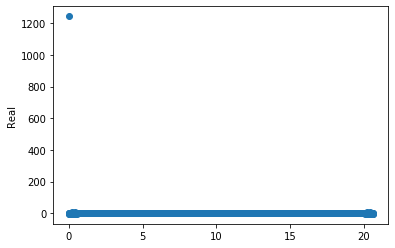

In [19]:
N = V1_23['E6D9D20DD197'].size
T = 120 / N

f = np.linspace(0, 1 / T, N)

plt.ylabel("Real")
plt.scatter(f, fft.real)
plt.show()

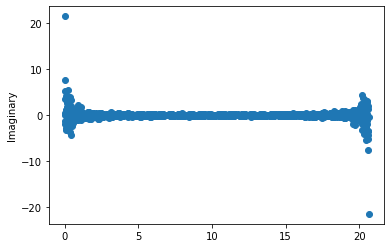

In [20]:
plt.ylabel("Imaginary")
plt.scatter(f, fft.imag)
plt.show()

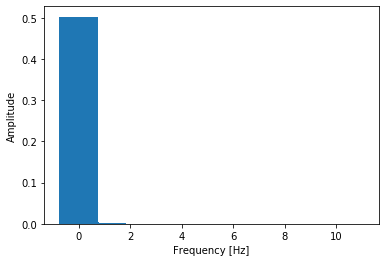

In [21]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(f[:N // 2], np.abs(fft)[:N // 2] * 1 / N, width=1.5)  # 1 / N is a normalization factor
plt.show()

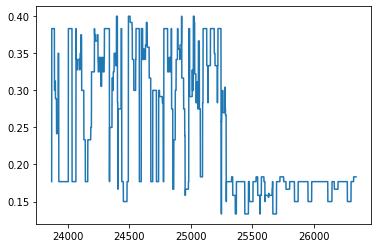

In [22]:
plt.plot(V1_23['C400A2E19293'])

In [23]:
fft = np.fft.fft(V1_23['C400A2E19293'])

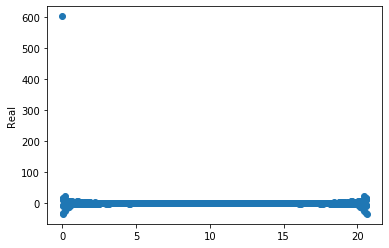

In [24]:
N = V1_23['C400A2E19293'].size
T = 120 / N

f = np.linspace(0, 1 / T, N)

plt.ylabel("Real")
plt.scatter(f, fft.real)
plt.show()

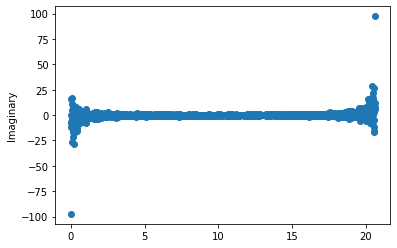

In [25]:
plt.ylabel("Imaginary")
plt.scatter(f, fft.imag)
plt.show()

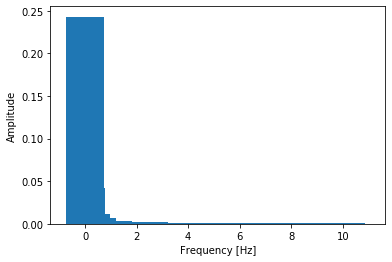

In [26]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(f[:N // 2], np.abs(fft)[:N // 2] * 1 / N, width=1.5)  # 1 / N is a normalization factor
plt.show()

In [27]:
from scipy import signal

xn = V1_23['C400A2E19293'].values
b, a = signal.butter(8, 0.03)
zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])

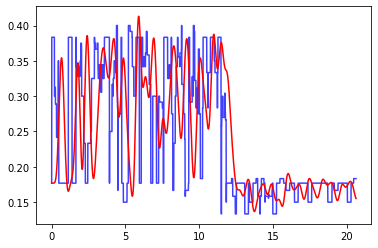

In [28]:
plt.plot(f, xn, 'b', alpha=0.75)
plt.plot(f, z, 'r')